# Importing The Important Lib 

In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,classification_report
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.model_selection import GridSearchCV




# Loading The dataset 

In [72]:
df=pd.read_csv('Houseprice.csv')

In [73]:
df.PRICE

0         565000
1         365000
2         287000
3         255000
4         325000
          ...   
33651    1040000
33652     410000
33653     427000
33654     295000
33655     295000
Name: PRICE, Length: 33656, dtype: int64

# Exploration The Data 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

# Checking The NAN Values 

In [75]:
df.isnull().sum()


ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [76]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [77]:
df['GARAGE'].value_counts()

2.0     20724
1.0      5290
3.0      2042
4.0      1949
6.0       466
5.0       362
8.0       129
7.0        97
12.0       30
10.0       26
9.0        17
14.0       13
13.0        8
11.0        7
16.0        4
18.0        3
20.0        3
32.0        1
17.0        1
21.0        1
99.0        1
26.0        1
22.0        1
50.0        1
31.0        1
Name: GARAGE, dtype: int64

# Check The Mode of Features 

In [78]:
df.GARAGE.mode()


0    2.0
Name: GARAGE, dtype: float64

### Replacing the NAN values by Mode Values 

In [79]:
replace_value= df['GARAGE'].mode()[0]
replace_value

2.0

In [80]:
df['BEDROOMS'].value_counts()

4     17635
3     11617
5      2476
2      1457
6       296
1        95
7        53
8        21
9         4
10        2
Name: BEDROOMS, dtype: int64

In [81]:
df['BATHROOMS'].value_counts()

2     22264
1      8839
3      2284
4       229
5        30
6         7
7         2
16        1
Name: BATHROOMS, dtype: int64

In [82]:
df['FLOOR_AREA'].value_counts()

200    401
150    362
160    337
130    333
180    326
      ... 
849      1
686      1
504      1
517      1
644      1
Name: FLOOR_AREA, Length: 528, dtype: int64

In [83]:
df['GARAGE']=df['GARAGE'].fillna(replace_value)

In [84]:
replace_value2= df['BUILD_YEAR'].mode()[0]
replace_value2

2000.0

In [85]:
df['BUILD_YEAR']=df['BUILD_YEAR'].fillna(replace_value2)

In [86]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE                  0
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR              0
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

#  Checking The outliers of Features 

<AxesSubplot:ylabel='NEAREST_SCH_DIST'>

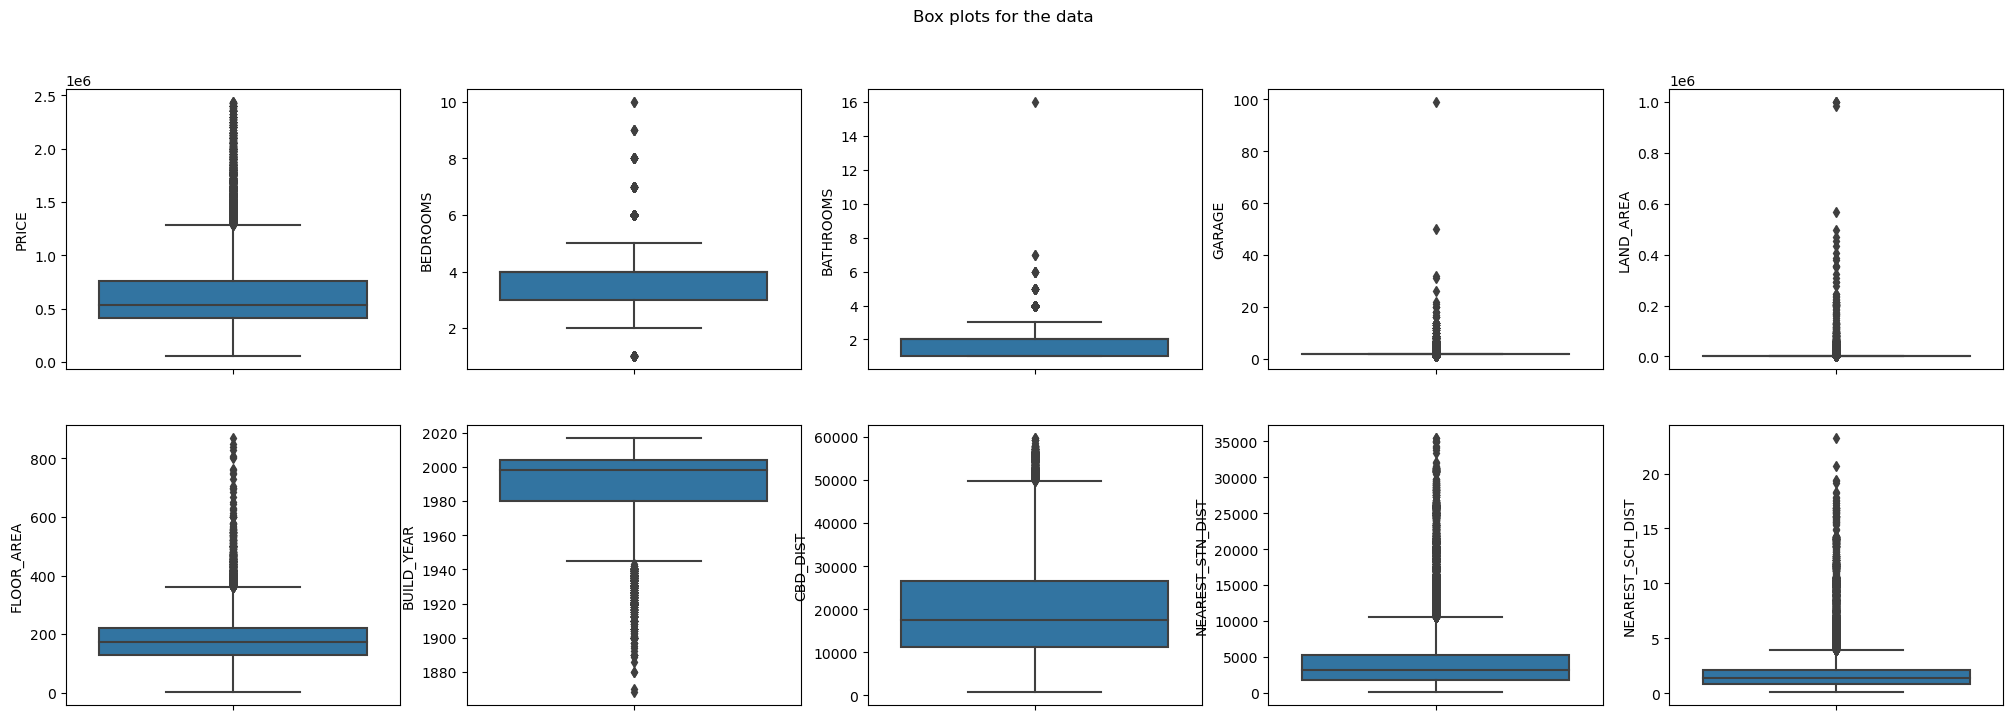

In [87]:
fig, axes = plt.subplots(2, 5, figsize=(25, 8))

fig.suptitle('Box plots for the data')

sns.boxplot(ax=axes[0, 0], data=df, y='PRICE')
sns.boxplot(ax=axes[0, 1], data=df, y='BEDROOMS')
sns.boxplot(ax=axes[0, 2], data=df, y='BATHROOMS')
sns.boxplot(ax=axes[0, 3], data=df, y='GARAGE')
sns.boxplot(ax=axes[0, 4], data=df, y='LAND_AREA')
sns.boxplot(ax=axes[1, 0], data=df, y='FLOOR_AREA')
sns.boxplot(ax=axes[1, 1], data=df, y='BUILD_YEAR')
sns.boxplot(ax=axes[1, 2], data=df, y='CBD_DIST')
sns.boxplot(ax=axes[1, 3], data=df, y='NEAREST_STN_DIST')
sns.boxplot(ax=axes[1, 4], data=df, y='NEAREST_SCH_DIST')



c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='NEAREST_SCH_DIST', ylabel='Density'>

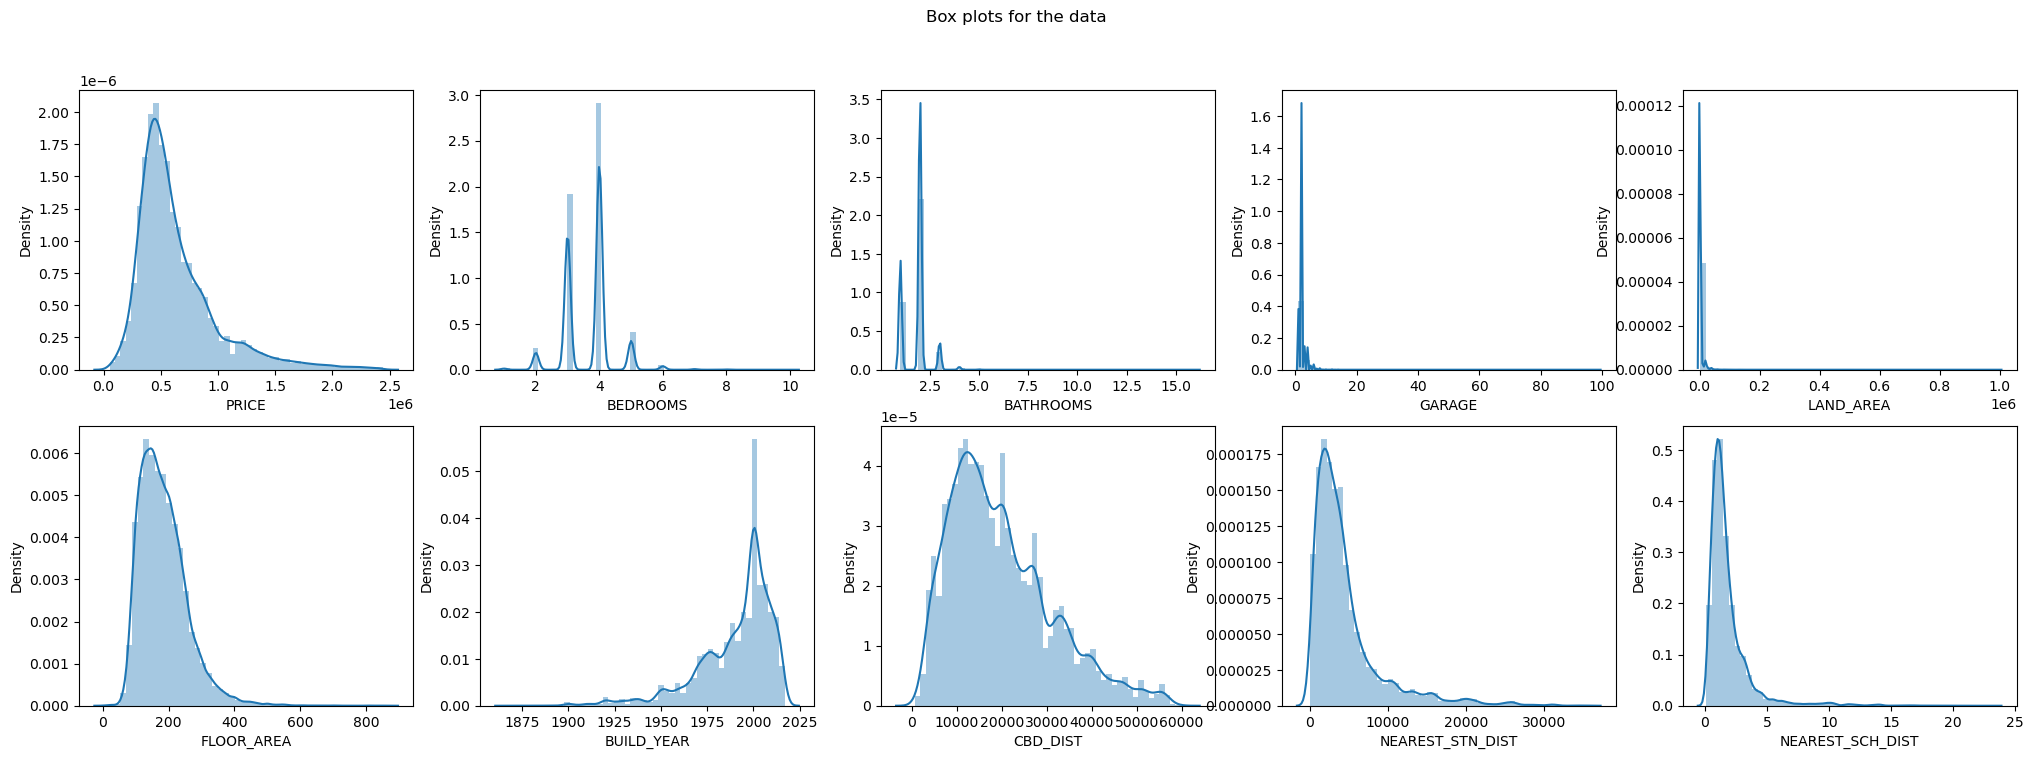

In [88]:
fig, axes = plt.subplots(2, 5, figsize=(25, 8))

fig.suptitle('Box plots for the data')

sns.distplot(df['PRICE'],ax=axes[0, 0])
sns.distplot(df['BEDROOMS'],ax=axes[0, 1])
sns.distplot (df['BATHROOMS'],ax=axes[0, 2])
sns.distplot(df.GARAGE,ax=axes[0, 3])
sns.distplot(df.LAND_AREA,ax=axes[0, 4])
sns.distplot(df.FLOOR_AREA,ax=axes[1, 0])
sns.distplot(df.BUILD_YEAR,ax=axes[1, 1])
sns.distplot(df.CBD_DIST,ax=axes[1, 2] )
sns.distplot(df.NEAREST_STN_DIST,ax=axes[1, 3], )
sns.distplot(df.NEAREST_SCH_DIST,ax=axes[1, 4])



# Distribution of Feature 

<AxesSubplot:xlabel='NEAREST_SCH_DIST', ylabel='PRICE'>

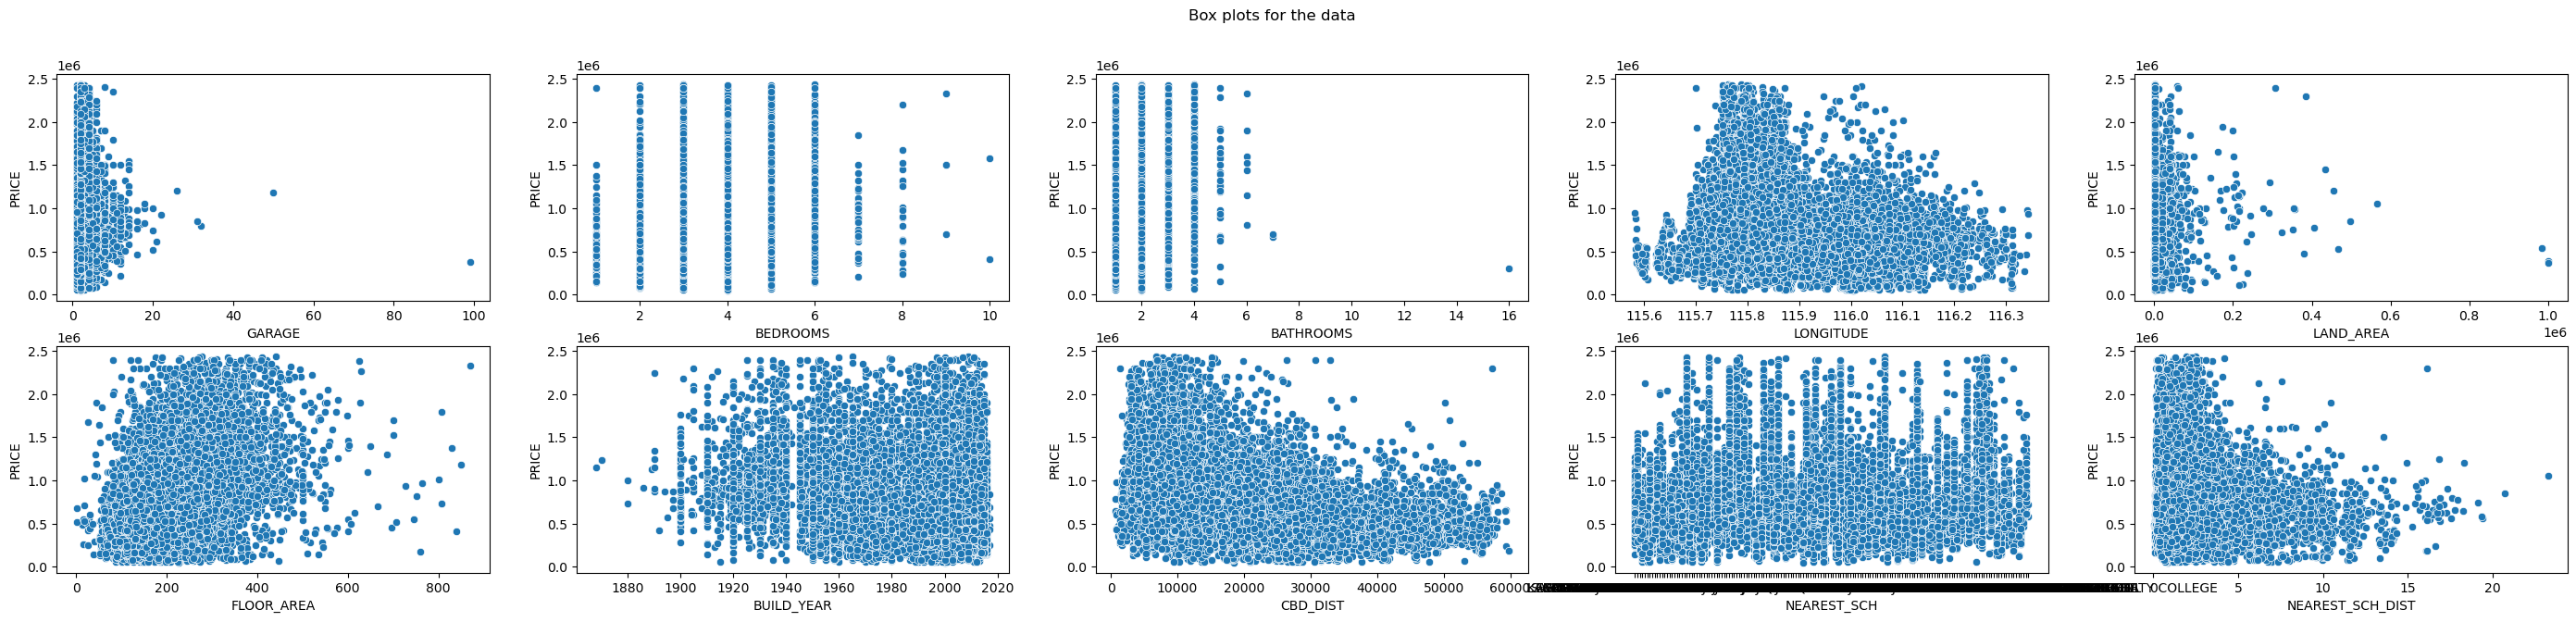

In [89]:
fig, axes = plt.subplots(2, 5, figsize=(35, 7))

fig.suptitle('Box plots for the data')

sns.scatterplot(x=df.GARAGE,y=df.PRICE,ax=axes[0, 0])
sns.scatterplot(x=df.BEDROOMS,y=df.PRICE,ax=axes[0, 1], )
sns.scatterplot(x=df.BATHROOMS,y=df.PRICE,ax=axes[0, 2])
sns.scatterplot(x=df.LONGITUDE,y=df.PRICE,ax=axes[0, 3])
sns.scatterplot(x=df.LAND_AREA,y=df.PRICE,ax=axes[0, 4])
sns.scatterplot(x=df.FLOOR_AREA,y=df.PRICE,ax=axes[1, 0] )
sns.scatterplot(x=df.BUILD_YEAR,y=df.PRICE,ax=axes[1, 1])
sns.scatterplot(x=df.CBD_DIST,y=df.PRICE,ax=axes[1, 2])
sns.scatterplot(x=df.NEAREST_SCH,y=df.PRICE,ax=axes[1, 3])
sns.scatterplot(x=df.NEAREST_SCH_DIST,y=df.PRICE,ax=axes[1, 4])



# Fixing The outliers 

In [90]:
min_thresold, max_thresold = df.GARAGE.quantile([0.001, 0.999])
min_thresold, max_thresold

(1.0, 13.0)

In [91]:
df = df[(df.GARAGE<max_thresold) & (df.GARAGE>min_thresold)]

In [92]:
min_thresold1, max_thresold1 = df.BATHROOMS.quantile([0.001, 0.999])
print('min and max threeshold for bathrooms',min_thresold1,max_thresold1)
min_thresold2, max_thresold2 = df.LAND_AREA.quantile([0.001, 0.999])
print('min and max threeshold for land area',min_thresold2,max_thresold2)

min_thresold3, max_thresold3 = df.CBD_DIST.quantile([0.001, 0.999])
print('min and max threeshold for cbd distance',min_thresold3,max_thresold3)



min and max threeshold for bathrooms 1.0 5.0
min and max threeshold for land area 129.0 213853.4280000025
min and max threeshold for cbd distance 1800.0 57200.0


# Removing The outliers of dataset 

In [93]:
df = df[(df.BATHROOMS<max_thresold1) & (df.BATHROOMS>min_thresold1)]
df = df[(df.LAND_AREA<max_thresold2) & (df.LAND_AREA>min_thresold2)]
df = df[(df.CBD_DIST<max_thresold3) & (df.CBD_DIST>min_thresold3)]

<AxesSubplot:ylabel='NEAREST_SCH_RANK'>

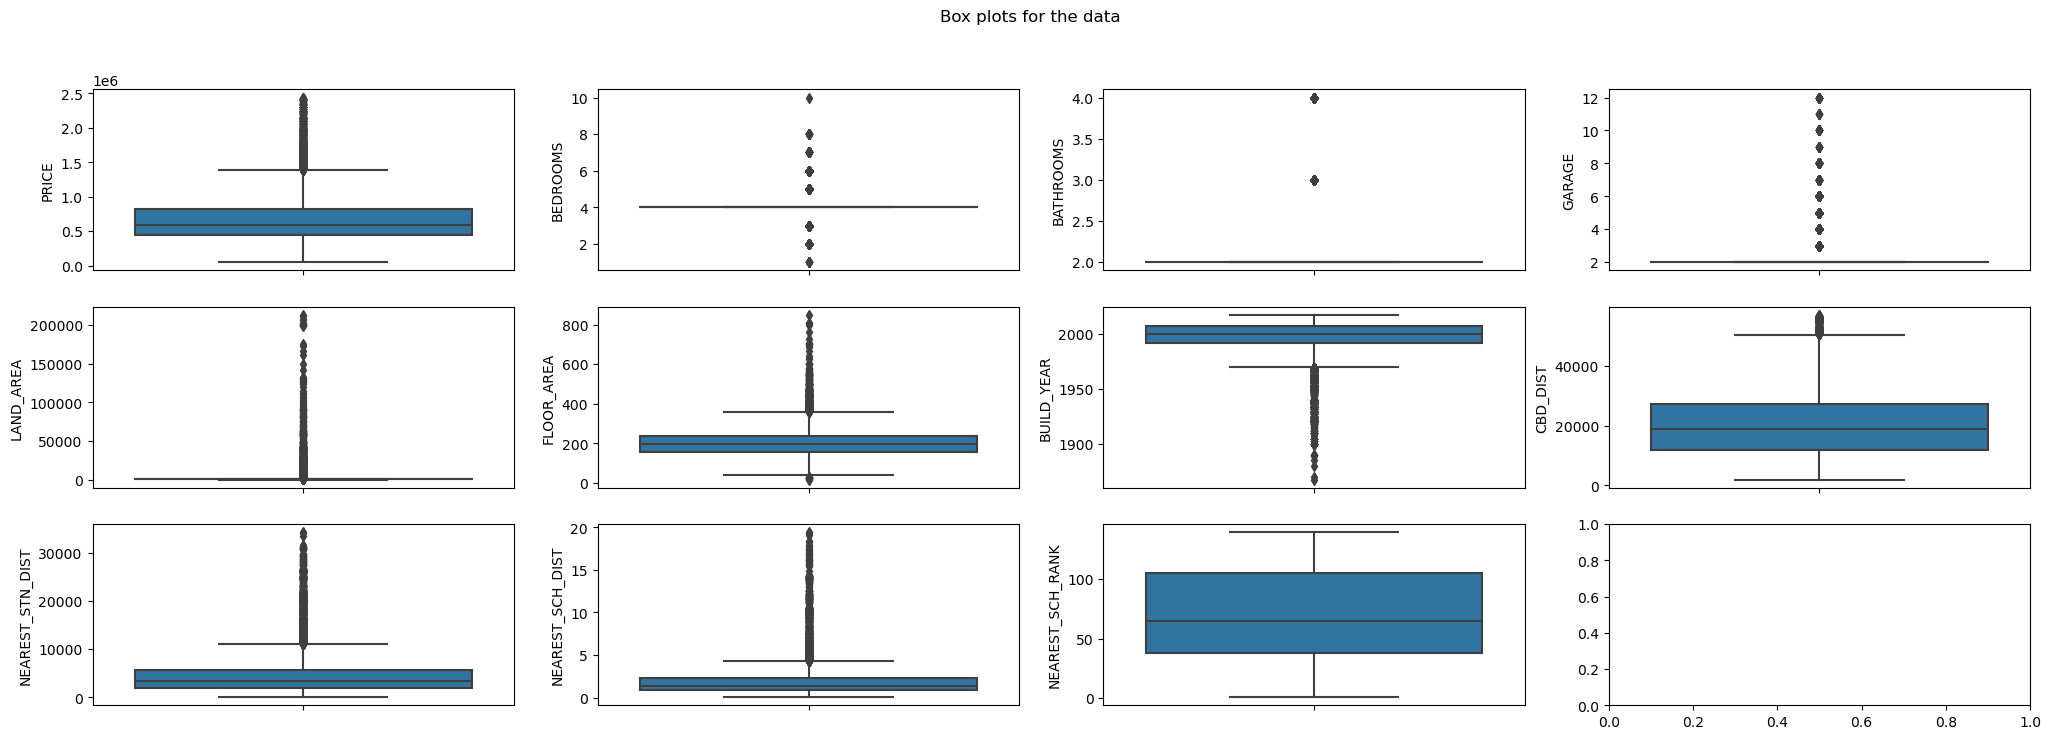

In [94]:
fig, axes = plt.subplots(3, 4, figsize=(25, 8))

fig.suptitle('Box plots for the data')

sns.boxplot(ax=axes[0, 0], data=df, y='PRICE')
sns.boxplot(ax=axes[0, 1], data=df, y='BEDROOMS')
sns.boxplot(ax=axes[0, 2], data=df, y='BATHROOMS')
sns.boxplot(ax=axes[0, 3], data=df, y='GARAGE')
sns.boxplot(ax=axes[1, 0], data=df, y='LAND_AREA')
sns.boxplot(ax=axes[1, 1], data=df, y='FLOOR_AREA')
sns.boxplot(ax=axes[1, 2], data=df, y='BUILD_YEAR')
sns.boxplot(ax=axes[1, 3], data=df, y='CBD_DIST')
sns.boxplot(ax=axes[2, 0], data=df, y='NEAREST_STN_DIST')
sns.boxplot(ax=axes[2, 1], data=df, y='NEAREST_SCH_DIST')
sns.boxplot(ax=axes[2, 2], data=df, y='NEAREST_SCH_RANK')

In [95]:
df.drop(["ADDRESS", "NEAREST_SCH_RANK","SUBURB"], axis=1, inplace=True)

### The Correlation among Features 

<AxesSubplot:>

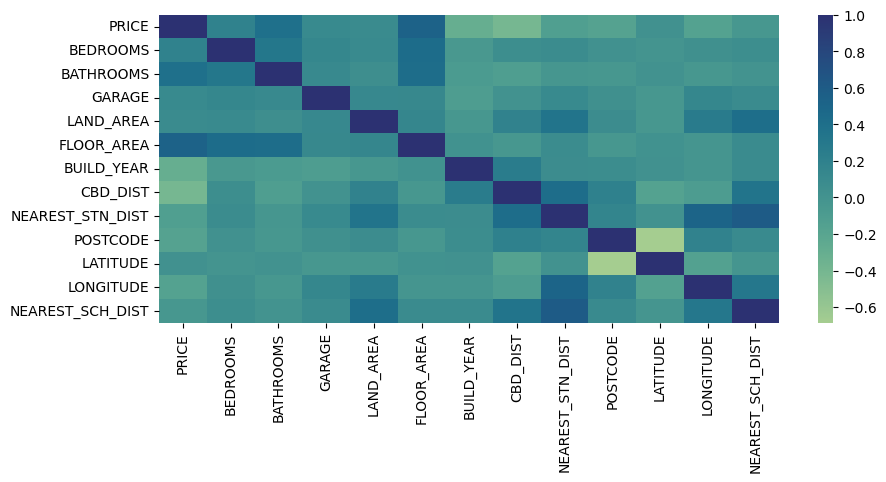

In [96]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='crest')

### Use Dumies to Encoding The non Numeric Features 

In [97]:
for i in [ 'NEAREST_STN', 'NEAREST_SCH','POSTCODE']:
    dummies = pd.get_dummies(df[i])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(i, axis=1)

In [98]:
df.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,...,6169,6170,6171,6172,6173,6174,6175,6176,6556,6558
0,565000,4,2,2.0,600,160,2003.0,18300,1800,09-2018\r,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2.0,351,139,2013.0,26900,4900,02-2019\r,...,0,0,0,0,0,0,0,0,0,0
6,400000,3,2,2.0,386,132,2014.0,28200,3700,05-2016\r,...,0,0,0,0,0,0,0,0,0,0
7,370000,4,2,2.0,468,158,2013.0,41700,1100,03-2019\r,...,1,0,0,0,0,0,0,0,0,0
8,565000,4,2,3.0,875,168,1983.0,12100,2500,06-2020\r,...,0,0,0,0,0,0,0,0,0,0


# Splitting The year from the Date 

In [99]:
df["DATE_SOLD"] = pd.to_datetime(df["DATE_SOLD"])
df["DATE_YEAR"] = df["DATE_SOLD"].dt.year


In [100]:
df.drop(["DATE_SOLD"],axis=1,inplace=True)

<AxesSubplot:xlabel='DATE_YEAR', ylabel='Count'>

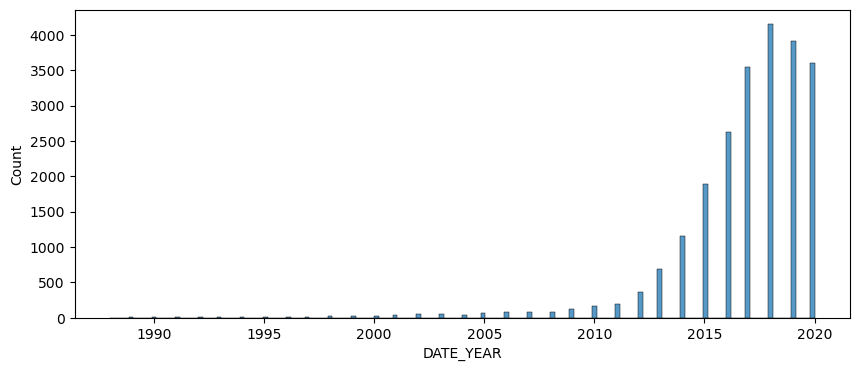

In [101]:
sns.histplot(data= df, x="DATE_YEAR",multiple='stack')

<AxesSubplot:xlabel='BUILD_YEAR', ylabel='Density'>

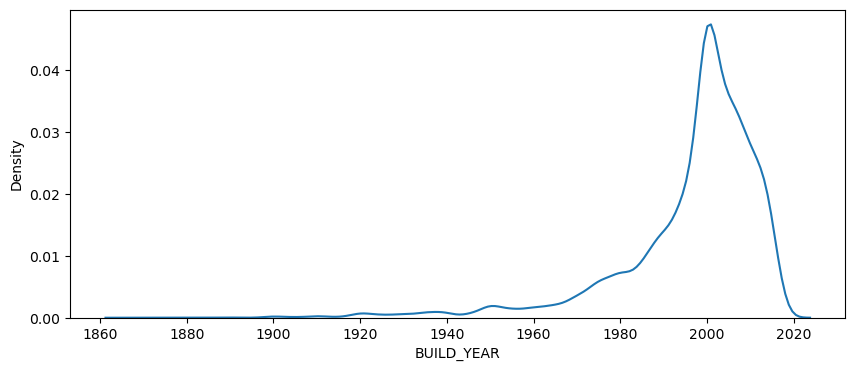

In [102]:
sns.kdeplot(data=df,x='BUILD_YEAR')

### Spliting The Dataset 

In [103]:
X= df.drop(['PRICE'],axis=1)
Y= df['PRICE']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Using StandardScaler to Reduce the range of Numbers 

In [106]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test

c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[ 0.15289979,  2.54664985, -0.36398624, ..., -0.04542492,
        -0.03124661, -0.24954269],
       [-1.40342273, -0.3296508 , -0.36398624, ..., -0.04542492,
        -0.03124661, -0.85009837],
       [ 1.70922231,  2.54664985,  1.58976656, ..., -0.04542492,
        -0.03124661, -0.24954269],
       ...,
       [ 0.15289979, -0.3296508 ,  0.61289016, ..., -0.04542492,
        -0.03124661, -1.1503762 ],
       [-1.40342273,  2.54664985, -0.36398624, ..., -0.04542492,
        -0.03124661, -2.95204321],
       [ 0.15289979, -0.3296508 , -0.36398624, ..., -0.04542492,
        -0.03124661, -0.54982053]])

### Using Machine learning Models 

# 1- RandomForest 

In [107]:

rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training set
rf.fit(x_train, y_train)

# Predict the target values for the testing set
y_pred_RF = rf.predict(x_test)

# Calculate the coefficient of determination (R^2) of the model
score = rf.score(x_test, y_test)
r2_sco_RF= r2_score(y_test,y_pred_RF)*100
print("Accuracy of Model (R^2): {:.2f}".format(r2_sco_RF))

Accuracy of Model (R^2): 85.97


### Scatterplot for prediction Values 

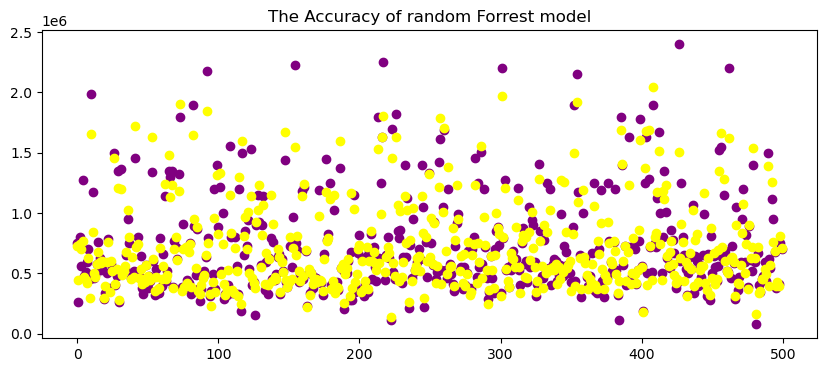

In [108]:
plt.title('The Accuracy of random Forrest model')
plt.scatter(np.arange(500), y_test[:500], color= 'purple')
plt.scatter(np.arange(500), y_pred_RF[:500], color= 'yellow')

# 2 - Lasso and Ridge

In [109]:
lass_model=Lasso(alpha=0.1)
rid_model=Ridge(alpha=0.1)
lass_model.fit(x_train,y_train)
rid_model.fit(x_train,y_train)

y_pred_lass = lass_model.predict(x_test)
y_pred_ridge = rid_model.predict(x_test)

c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.604e+14, tolerance: 2.463e+11
  model = cd_fast.enet_coordinate_descent(


In [110]:
r2_sco_lass= r2_score(y_test,y_pred_lass)*100
r2_sco_ridge= r2_score(y_test,y_pred_ridge)*100
print(r2_sco_lass)
print(r2_sco_ridge)



77.78053225994414
77.78083340618403


###  Scatterplot of prediction 

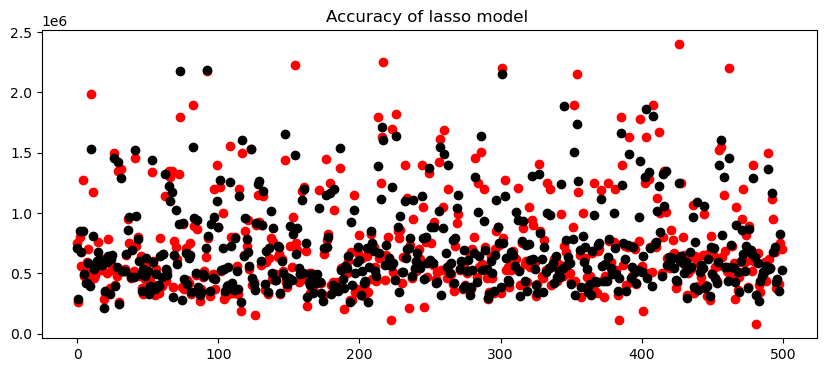

In [111]:

plt.title('Accuracy of lasso model ')
plt.scatter(np.arange(500), y_test[:500], color= 'red')
plt.scatter(np.arange(500), y_pred_lass[:500], color= 'black')


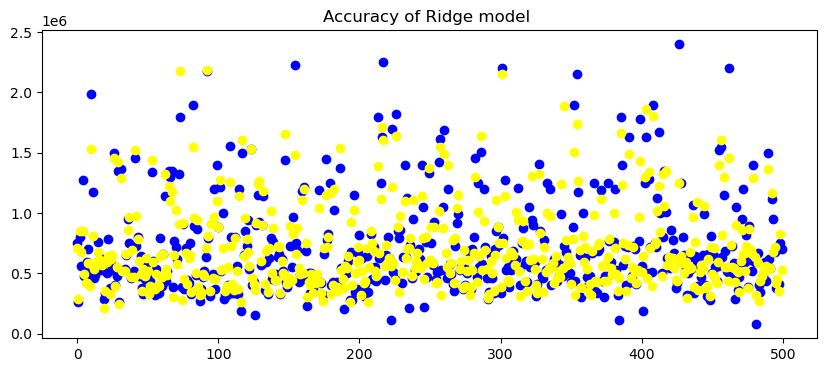

In [112]:

plt.title('Accuracy of Ridge model ')
plt.scatter(np.arange(500), y_test[:500], color= 'blue')
plt.scatter(np.arange(500), y_pred_ridge[:500], color= 'yellow')


# 3-  Decision  Tree 

In [136]:

dt = DecisionTreeRegressor(max_depth=10,random_state=42)

# Train the model on the training set
dt.fit(x_train, y_train)

y_pred_dt= dt.predict(x_test)


# Calculate the coefficient of determination (R^2) of the model

r2_sco_dt=r2_score(y_test,y_pred_dt)*100
print("Accuracy of model : {:.2f}".format(r2_sco_dt))



Accuracy of model : 76.25


In [122]:
 feat = (df.drop(['PRICE'],axis=1) ).columns
 feat=[str(i) for i in feat]
type(feat)
class_name=df['PRICE'].unique().astype(str).tolist()

## Scatterplot of prediction 

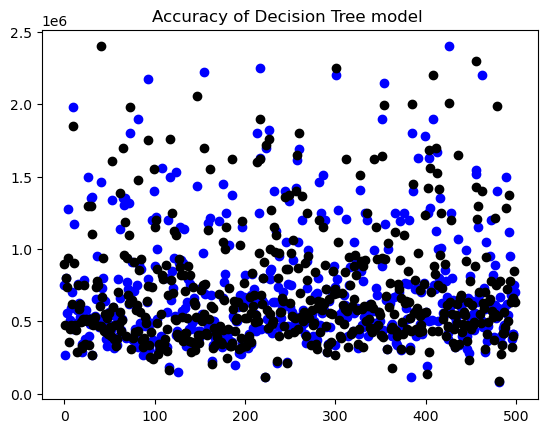

In [ ]:

plt.title('Accuracy of Decision Tree model ')
plt.scatter(np.arange(500), y_test[:500],label='test', color= 'blue')
plt.scatter(np.arange(500), y_pred_dt[:500], color= 'black')


# 4- KNN

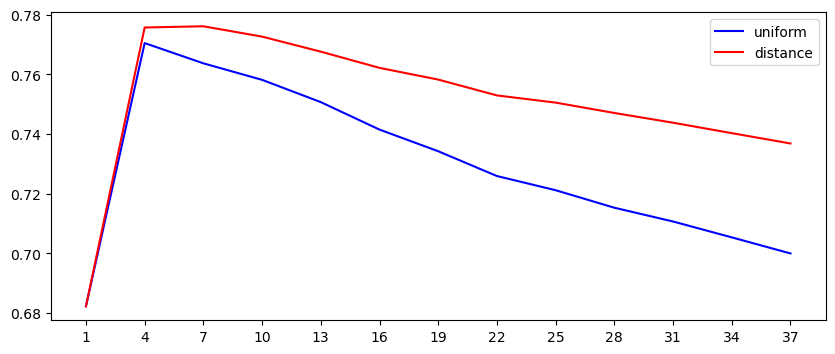

In [ ]:

uniform  = []
distance = []
r = range (1,40,3)

for k in r:
    
    # Euclidan, 'straight' distance
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    knn.fit(x_train, y_train)
    uniform.append(knn.score(x_test,y_test))

    # Distance is inversely proportional (to lessen the weight of outliers)
    knn = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    knn.fit(x_train, y_train)
    distance.append(knn.score(x_test,y_test))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5, weights='distance') 
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)
r2_sco_knn = r2_score(y_test, y_pred_knn)*100
print(r2_sco_knn)


77.56533282743563


## SCATTERPLOT 

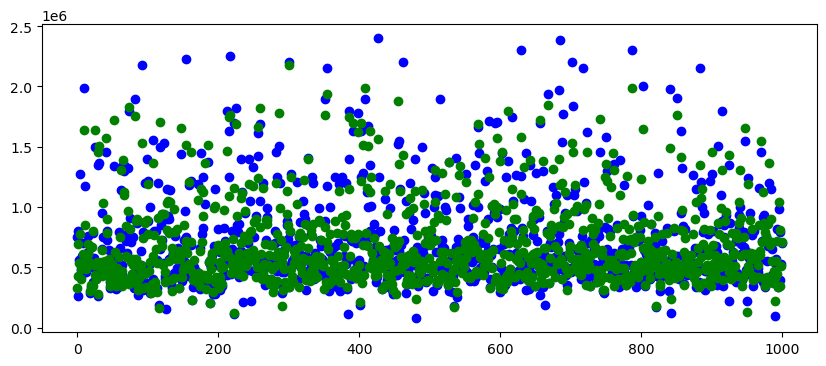

In [ ]:

plt.scatter(np.arange(1000), y_test[:1000], color= 'blue')
plt.scatter(np.arange(1000), y_pred_knn[:1000], color= 'green')

# 5- Gradiant Boosting 

In [ ]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 1000, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
y_pred_clf=clf.predict(x_test)
r2_sco_clf=r2_score(y_test,y_pred_clf)
r2_sco_clf

c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


0.8712134375793216

In [ ]:
r2_sco_clf=r2_score(y_test,y_pred_clf)*100


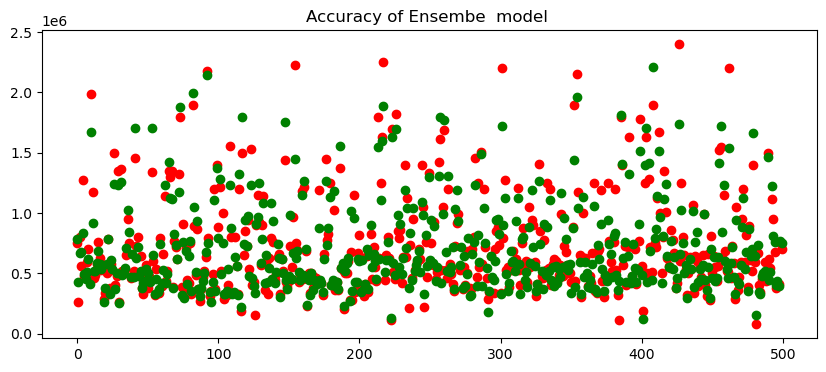

In [ ]:

plt.title('Accuracy of Ensembe  model ')
plt.scatter(np.arange(500), y_test[:500], color= 'red')
plt.scatter(np.arange(500), y_pred_clf[:500], color= 'green')


In [ ]:
compare1= {'Model':['KNN','Decision Tree','Random Forrest','Lasso','Ridge','Gradiant Ensemble'],
          'r2_score':[r2_sco_knn,r2_sco_dt,r2_sco_RF,r2_sco_lass,r2_sco_ridge,r2_sco_clf]}

In [ ]:
#evs_knn = explained_variance_score(y_test, y_pred_knn)
evs_dt=explained_variance_score(y_test, y_pred_dt)
evs_rf=explained_variance_score(y_test, y_pred_RF)
evs_lass=explained_variance_score(y_test, y_pred_lass)
evs_ridge=explained_variance_score(y_test, y_pred_ridge)
evs_clf=explained_variance_score(y_test, y_pred_clf)
evs_knn=explained_variance_score(y_test,y_pred_knn)


# Comparsion between model EVS 

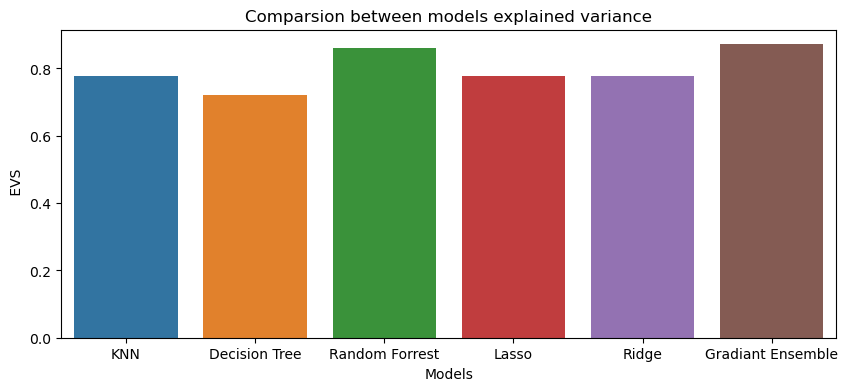

In [ ]:
compare2= {'Model':['KNN','Decision Tree','Random Forrest','Lasso','Ridge','Gradiant Ensemble'],
          'Explained Variance':[evs_knn,evs_dt,evs_rf,evs_lass,evs_ridge,evs_clf]}

sns.barplot( x='Model',y='Explained Variance',data= compare2)
plt.title("Comparsion between models explained variance")
plt.xlabel("Models")
plt.ylabel(" EVS")

plt.show()

# Comparsion between model R2_SCORE 

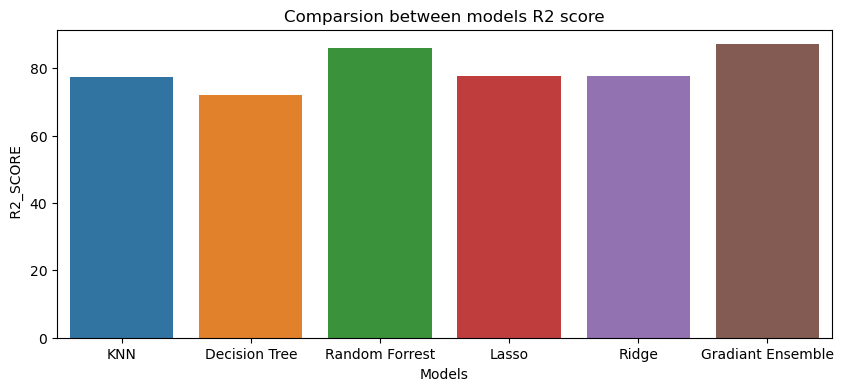

In [ ]:
sns.barplot( x='Model',y=r'r2_score',data= compare1)
plt.title("Comparsion between models R2 score")
plt.xlabel("Models")
plt.ylabel(" R2_SCORE")

plt.show()

In [ ]:
mse_knn=mean_absolute_error(y_test,y_pred_knn)
mse_dt=mean_absolute_error(y_test,y_pred_dt)
mse_rf=mean_absolute_error(y_test,y_pred_RF)
mse_lass=mean_absolute_error(y_test,y_pred_lass)
mse_ridge=mean_absolute_error(y_test,y_pred_ridge)
mse_clf=mean_absolute_error(y_test,y_pred_clf)


In [ ]:
mse_knn=mean_absolute_error(y_test,y_pred_knn)
mse_knn


110358.50514561374

# Comparsion between model MAE

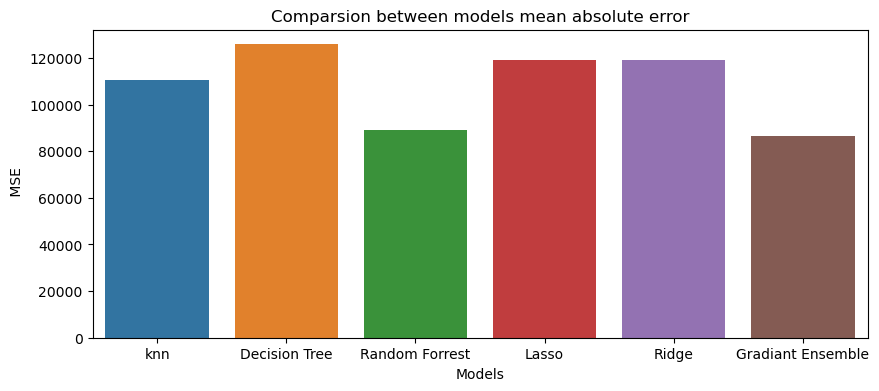

In [ ]:
compare3= {'Model':['knn','Decision Tree','Random Forrest','Lasso','Ridge','Gradiant Ensemble'],
          'Mse':[mse_knn,mse_dt,mse_rf,mse_lass,mse_ridge,mse_clf]}

sns.barplot( x='Model',y='Mse',data= compare3)
plt.title("Comparsion between models mean absolute error")
plt.xlabel("Models")
plt.ylabel(" MSE")

plt.show()

# GridSearch CV for Decision Tree to tuning Hyperparameters 

In [127]:


from sklearn.model_selection import GridSearchCV



# Define the hyperparameters to tune
param_grid = {'max_depth': [4, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['mse', 'friedman_mse']}

# Create a Grid Search Cross Validation object
grid_search = GridSearchCV(dt, param_grid, cv=5,n_jobs=-1 )

# Train the Grid Search Cross Validation object on the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found by Grid Search Cross Validation
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Use the best model to predict the target values of the test data
y_pred = grid_search.predict(x_test)

# Calculate the mean squared error of the best model on the test data
acc = r2_score(y_test, y_pred)
print(f"acc : {acc:.2f}")

c:\Users\waleed\Downloads\New folder\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


Best Hyperparameters: {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
acc : 0.77


# plot Tree after Tuning 

In [ ]:
feature= df.columns
clas= df.md
plt.figure(figsize=(10, 8))
plot_tree(dt,
          feature_names=features,
          class_names=classes,
          rounded=True, 
          filled=True, 
          proportion=True); 